In [6]:
import geopandas
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib as mat
import rasterio
import rasterio.plot
import PIL

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable

from shapely.geometry import Point

In [3]:
#Australia state map and elevation
states = geopandas.read_file("C:\\Users\\IDCVLYAK\\Desktop\\PROJECTS\\JEV\\AUS_adm\\AUS_adm1.shp")
ozDEM = rasterio.open("C:\\Users\\IDCVLYAK\\Desktop\\PROJECTS\\JEV\\Oz elevation\\AUS_msk_alt.vrt")
ozDEM_w = ozDEM.read(1)

In [4]:
#Data points lats and long
pigsLA = np.genfromtxt("C:\\Users\\IDCVLYAK\\Desktop\\PROJECTS\\JEV\\pigsLA.txt")
pigsLO = np.genfromtxt("C:\\Users\\IDCVLYAK\\Desktop\\PROJECTS\\JEV\\pigsLO.txt")
ipigsLA = np.genfromtxt("C:\\Users\\IDCVLYAK\\Desktop\\PROJECTS\\JEV\\ipigsLA.txt")
ipigsLO = np.genfromtxt("C:\\Users\\IDCVLYAK\\Desktop\\PROJECTS\\JEV\\ipigsLO.txt")
caseLA = np.genfromtxt("C:\\Users\\IDCVLYAK\\Desktop\\PROJECTS\\JEV\\caseLA.txt")
caseLO = np.genfromtxt("C:\\Users\\IDCVLYAK\\Desktop\\PROJECTS\\JEV\\caseLO.txt")

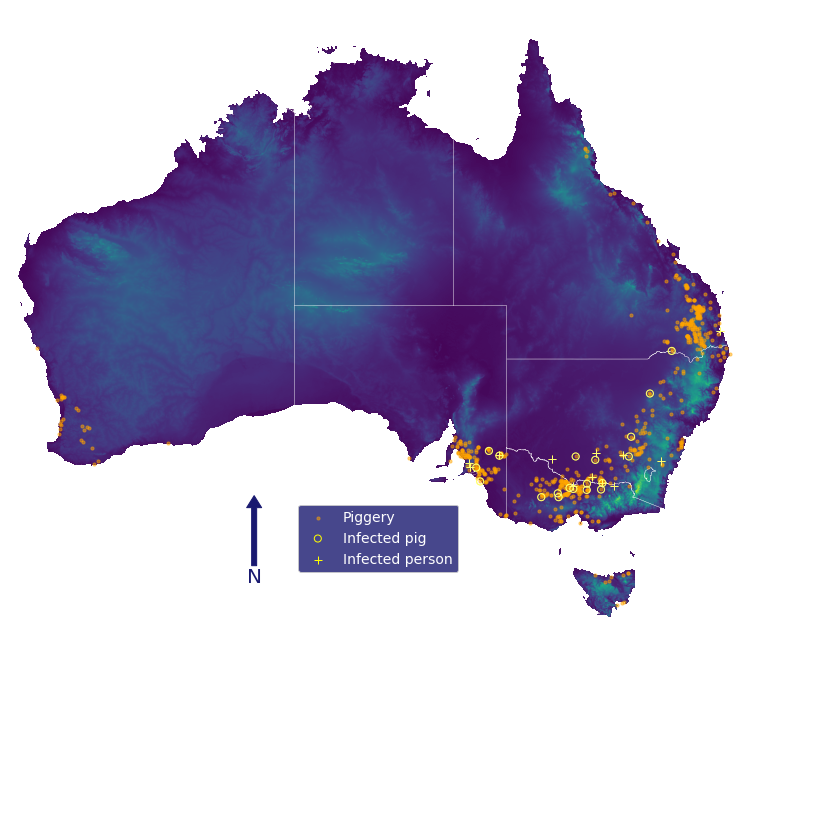

In [7]:
#Plot data points onto maps
fig, ax = plt.subplots(figsize=(15, 15))
rasterio.plot.show(ozDEM, ax=ax)
states.plot(ax=ax, facecolor='none', edgecolor='white', linewidth=0.25)

geometryP = [Point(xy) for xy in zip(pigsLO,pigsLA)]
pig_df = geopandas.GeoDataFrame(geometry = geometryP)
pig_df.plot(ax=ax, markersize = 10, color = 'orange', alpha=0.5, zorder=3, label='Piggery')

geometryiP = [Point(xy) for xy in zip(ipigsLO,ipigsLA)]
ipig_df = geopandas.GeoDataFrame(geometry = geometryiP)
ipig_df.plot(ax=ax, markersize = 50, color = 'yellow', marker='o', facecolors='none', linewidth=1, alpha=1, zorder=4, label='Infected pig')
ipig_df.plot(ax=ax, markersize = 50, color = 'lightyellow', marker='o', facecolors='none', linewidth=1, alpha=0.5, zorder=4)

geometryC = [Point(xy) for xy in zip(caseLO,caseLA)]
case_df = geopandas.GeoDataFrame(geometry = geometryC)
case_df.plot(ax=ax, markersize = 50, color = 'yellow', marker='+', linewidth=1, alpha=1, zorder=4, label='Infected person')
case_df.plot(ax=ax, markersize = 50, color = 'lightyellow', marker='+', linewidth=1, alpha=0.5, zorder=4)


ax.axis('off')
ax.margins(0)

ax.legend(bbox_to_anchor=(0.475,0.35), loc="lower center",  bbox_transform=fig.transFigure, 
          frameon=True, labelcolor='white', facecolor='midnightblue', fontsize=14)# framealpha=0.7)

x, y, arrow_length = 0.3, 0.4, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='midnightblue',edgecolor='midnightblue', width=5, headwidth=15),
            ha='center', va='center', fontsize=20, color='midnightblue',
            xycoords=ax.transAxes)

plt.savefig('JEV distribution April.png', bbox_inches="tight", dpi = 600)
plt.savefig('JEV distribution April.tif', bbox_inches="tight", dpi = 600)